Check scheduled data

In [19]:
import pandas as pd

# Load the new balanced file
df = pd.read_csv("C:\\Users\\Alex\\nurse\\data\\synthetic_schedule_40nurses_corrected.csv")
df['date'] = pd.to_datetime(df['date'])

# Calculate fortnight number (relative to earliest date in the data)
df['fortnight'] = ((df['date'] - df['date'].min()).dt.days // 14) + 1

# Compute total hours per nurse per fortnight
fn_hours = df.groupby(['nurse_id', 'fortnight'])['duration_hours'].sum()

# Define your acceptable range
low, high = 65, 90

under = fn_hours[fn_hours < low]
within = fn_hours[(fn_hours >= low) & (fn_hours <= high)]
over = fn_hours[fn_hours > high]

print(f"Total nurse-fortnight pairs: {len(fn_hours)}")
print(f"Under {low} hours: {len(under)} ({len(under)/len(fn_hours):.1%})")
print(f"Within {low}-{high} hours: {len(within)} ({len(within)/len(fn_hours):.1%})")
print(f"Over {high} hours: {len(over)} ({len(over)/len(fn_hours):.1%})")

# Show examples
print("\nExamples of under-scheduled (lowest 10):")
print(under.sort_values().head(10))

print("\nExamples of over-scheduled (highest 10):")
print(over.sort_values(ascending=False).head(10))


Total nurse-fortnight pairs: 200
Under 65 hours: 0 (0.0%)
Within 65-90 hours: 200 (100.0%)
Over 90 hours: 0 (0.0%)

Examples of under-scheduled (lowest 10):
Series([], Name: duration_hours, dtype: int64)

Examples of over-scheduled (highest 10):
Series([], Name: duration_hours, dtype: int64)



--- Assignments for 2025-07-09 ---
    ward  shift nurse_id start_time end_time  duration_hours
259    A     AM     N018      07:00    15:00               8
260    A  Flex2     N001      12:00    17:00               5
261    A  Flex3     N017      08:00    14:00               6
262    A  Flex4     N039      12:00    19:00               7
263    A  Flex5     N038      07:00    15:00               8
264    A  Flex6     N016      07:00    19:00              12
265    A  Night     N027      20:00    08:00              12
266    B     AM     N022      07:00    15:00               8
267    B     AM     N024      07:00    15:00               8
268    B  Flex1     N002      09:00    13:00               4
269    B  Flex1     N012      10:00    14:00               4
270    B  Flex3     N017      12:00    18:00               6
271    B  Flex5     N008      10:00    18:00               8
272    C  Flex2     N004      09:00    14:00               5
273    C  Flex4     N034      12:00    19:00     

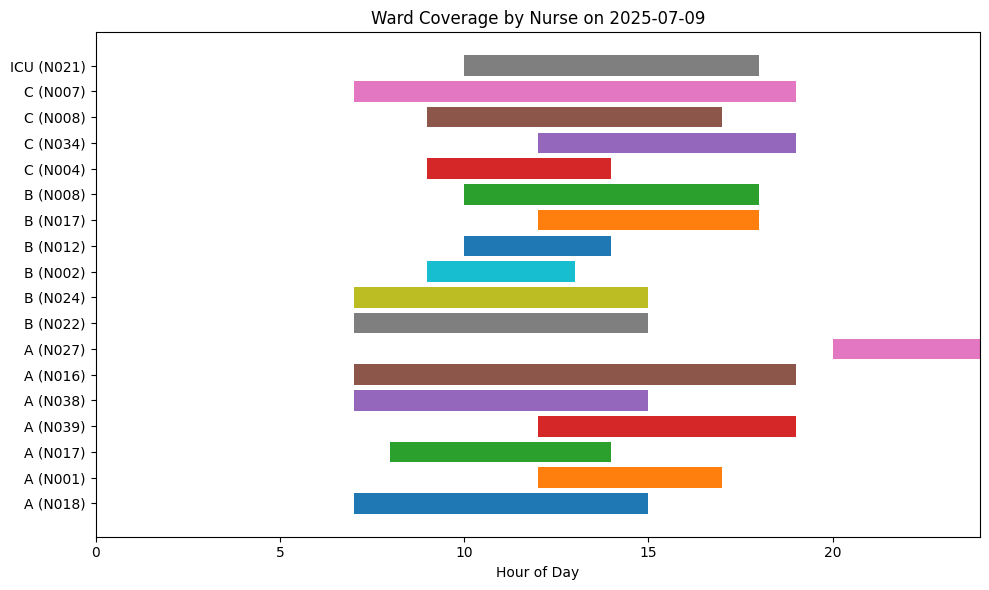

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Pick a random date in the dataset
random_date = np.random.choice(df['date'].unique())
day_df = df[df['date'] == random_date].sort_values(['ward', 'shift'])

display_date = pd.to_datetime(random_date).date()
print(f"\n--- Assignments for {display_date} ---")
print(day_df[['ward', 'shift', 'nurse_id', 'start_time', 'end_time', 'duration_hours']])

plt.figure(figsize=(10, max(4, len(day_df) // 3)))
for idx, row in day_df.iterrows():
    start = int(str(row['start_time']).split(":")[0])
    end = int(str(row['end_time']).split(":")[0])
    if end <= start:
        # Overnight shift: show only the part from start to 24 (midnight)
        plt.barh(f"{row['ward']} ({row['nurse_id']})", 24 - start, left=start)
        # (Optional) to indicate that this shift continues into the next day, you could add a marker at 24
    else:
        plt.barh(f"{row['ward']} ({row['nurse_id']})", end - start, left=start)
plt.xlabel('Hour of Day')
plt.xlim(0, 24)
plt.title(f'Ward Coverage by Nurse on {display_date}')
plt.tight_layout()
plt.show()


Check preference data 

In [24]:
import pandas as pd

# Load the new balanced file
df = pd.read_csv("C:\\Users\\Alex\\nurse\\data\\preference_next4weeks_full.csv")
df['date'] = pd.to_datetime(df['date'])

# Calculate fortnight number (relative to earliest date in the data)
df['fortnight'] = ((df['date'] - df['date'].min()).dt.days // 14) + 1

# Compute total hours per nurse per fortnight
fn_hours = df.groupby(['nurse_id', 'fortnight'])['duration_hours'].sum()

# Define your acceptable range
low, high = 65, 90

under = fn_hours[fn_hours < low]
within = fn_hours[(fn_hours >= low) & (fn_hours <= high)]
over = fn_hours[fn_hours > high]

print(f"Total nurse-fortnight pairs: {len(fn_hours)}")
print(f"Under {low} hours: {len(under)} ({len(under)/len(fn_hours):.1%})")
print(f"Within {low}-{high} hours: {len(within)} ({len(within)/len(fn_hours):.1%})")
print(f"Over {high} hours: {len(over)} ({len(over)/len(fn_hours):.1%})")

# Show examples
print("\nExamples of under-scheduled (lowest 10):")
print(under.sort_values().head(10))

print("\nExamples of over-scheduled (highest 10):")
print(over.sort_values(ascending=False).head(10))


Total nurse-fortnight pairs: 80
Under 65 hours: 0 (0.0%)
Within 65-90 hours: 5 (6.2%)
Over 90 hours: 75 (93.8%)

Examples of under-scheduled (lowest 10):
Series([], Name: duration_hours, dtype: int64)

Examples of over-scheduled (highest 10):
nurse_id  fortnight
N020      1            128
N033      1            125
N016      1            124
N038      1            121
N008      2            120
N028      1            120
N026      1            119
N011      1            119
N005      2            119
N021      1            118
Name: duration_hours, dtype: int64
